In [1]:
# Imports

%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift
import scipy.signal as sc

# Práctica 5: Transformada Z

## Ejercicio 1
Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la función de transferencia H(z) de los siguientes sistemas LTI causales:

1. $ y[n] - \frac{1}{2}y[n - 1] + \frac{1}{4} y[n-2] = x[n] $

$$ Y(z) - \frac{1}{2} Y(z) z^{-1} + \frac{1}{4} Y(z) z^{-2} = X(z) $$
$$ Y(z) (1 - \frac{1}{2} z^{-1} + \frac{1}{4}z^{-2} )= X(z) $$
$$ H(z) = \frac{Y(z)}{ X(z) } = \frac{1}{(1 - \frac{1}{2} z^{-1} + \frac{1}{4}z^{-2} )} $$

2. $ y[n] = y[n-1] + y[n-2] + x[n-1] $

$$ y[n] - y[n-1] - y[n-2] = x[n-1] $$
$$ Y(z) - Y(z) z^{-1} - Y(z) z^{-2} = X(z) z^{-1} $$
$$ Y(z) (1 - z^{-1} - z^{-2} )= X(z)*z^{-1} $$
$$ H(z) = \frac{Y(z)}{X(z)}  = \frac{z^{-1}}{(1 - z^{-1} - z^{-2} )} $$

3. $ y[n] = 7 x[n] + 2 y[n-1] - 6 y[n-2] $

$$ y[n] - 2 y[n-1] + 6 y[n-2] = 7 x[n]  $$
$$ Y(z) - 2 Y(z) z^{-1}  + 6 Y(z) z^{-2} = 7 X(z)  $$
$$ Y(z)  (1 - 2 z^{-1}  + 6 z^{-2}) = 7 X(z)  $$
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{7}{(1 - 2 z^{-1}  + 6 z^{-2})} $$

4. $ y[n] = \sum^{7}_{k=0} 2^{-k} x[n-k] $

$$ Y(z) = \sum^{7}_{k=0} 2^{-k} X(z)z^{-k} $$
$$ \frac{Y(z)}{X(z)} = \sum^{7}_{k=0} 2^{-k} z^{-k} $$
$$ \frac{Y(z)}{X(z)} = \sum^{7}_{k=0} (2z)^{-k} $$

## Ejercicio 2
Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relación entre la Transformada Z y la Transformada de Fourier.



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\

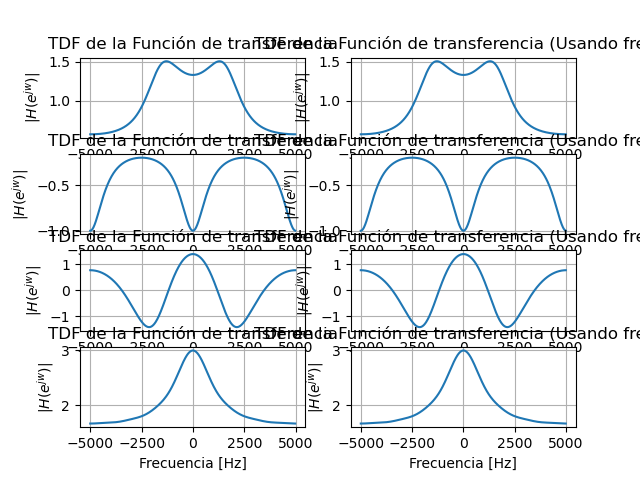

In [2]:
# para el grafico

#Variables principales
N = 512; fm = 10000
f = np.arange(-fm//2, fm//2, fm/N)  #Rango de redistribución de la frecuencia, solamente para el gráfico
omega = np.arange(0, 2*math.pi, 2*math.pi/N)    #Subdivisión del omega de 0 a 2pi, con salto N
ejw = np.exp(1j * omega)    #e^jw



#----------------Inciso 1
H = 1 / (1 - 1/2 * np.power(ejw,-1) + 1/4 * np.power(ejw, -2))

#Función de transf calculada por nosotros
plt.figure()
plt.subplot(4,2,1)
plt.plot(f,fftshift(H)); plt.title('TDF de la Función de transferencia'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)

#Función de transf calculada por freqz, para comparar si está bien
freq = sc.freqz([1], [1, -1/2, 1/4], whole = True)  #freqz recibe un vector con los parámetro para cada z. Comienza con z^0, z^-1 ...
#plt.figure()
plt.subplot(4,2,2)
plt.plot(f,fftshift(freq[1])); plt.title('TDF de la Función de transferencia (Usando freqz)'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)
#-------------------------

#----------------Inciso 2
H = (np.power(ejw,-1)) / (1 - np.power(ejw,-1) - np.power(ejw, -2))

#Función de transf calculada por nosotros
plt.subplot(4,2,3)
plt.plot(f,fftshift(H)); plt.title('TDF de la Función de transferencia'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)

#Función de transf calculada por freqz, para comparar si está bien
freq = sc.freqz([0, 1], [1, -1, -1], whole = True)  #freqz recibe un vector con los parámetro para cada z. Comienza con z^0, z^-1 ...
#plt.figure()
plt.subplot(4,2,4)
plt.plot(f,fftshift(freq[1])); plt.title('TDF de la Función de transferencia (Usando freqz)'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)
#-------------------------

#----------------Inciso 3
H = 7 / (1 - 2 * np.power(ejw,-1) + 6 * np.power(ejw, -2))

#Función de transf calculada por nosotros
plt.subplot(4,2,5)
plt.plot(f,fftshift(H)); plt.title('TDF de la Función de transferencia'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)

#Función de transf calculada por freqz, para comparar si está bien
freq = sc.freqz([7], [1, -2, 6], whole = True)  #freqz recibe un vector con los parámetro para cada z. Comienza con z^0, z^-1 ...
plt.subplot(4,2,6)
plt.plot(f,fftshift(freq[1])); plt.title('TDF de la Función de transferencia (Usando freqz)'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)
#-------------------------

#----------------Inciso 4
b = [2]
H = 2
for i in range(7):
    H += np.power(1/(2*ejw),i+1)
    b.append(np.power(1/2,i+1))

#Función de transf calculada por nosotros
plt.subplot(4,2,7)
plt.plot(f,fftshift(H)); plt.title('TDF de la Función de transferencia'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)

#Función de transf calculada por freqz, para comparar si está bien
freq = sc.freqz(b, whole = True)  #freqz recibe un vector con los parámetro para cada z. Comienza con z^0, z^-1 ...
plt.subplot(4,2,8)
plt.plot(f,fftshift(freq[1])); plt.title('TDF de la Función de transferencia (Usando freqz)'); plt.xlabel('Frecuencia [Hz]'); plt.ylabel(r'$|H(e^{jw})|$'); plt.grid(True)
#-------------------------


## Ejercicio 3
Considere el sistema

$$ H(z) = \frac{1-2z^{-1}+2z^{-2}-z^{-3}}{(1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})} $$

1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
2. Determine la respuesta al impulso del sistema.

Vamos a buscar la forma expandida y linda de la función de arriba, para eso, tenemos que hacer todos contra todos en el denominador, quedando..
$$-0.1z^{-3} + 0.8z^{-2}- 1.7z{-1} + 1$$
Entonces, tendremos la siguiente función

$$ H(z) = \frac{1-2z^{-1}+2z^{-2}-z^{-3}}{-0.1z^{-3} + 0.8z^{-2}- 1.7z{-1} + 1} $$



Antitransformamos la función de transferencia teniendo en cuenta las propiedades de linealidad y retardo de la Transformada Z y obtenemos la respuesta al impulso del sistema:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1-2z^{-1}+2z^{-2}-z^{-3}}{-0.1z^{-3} + 0.8z^{-2}- 1.7z{-1} + 1} $$
$$ -0.1z^{-3} Y(z) + 0.8z^{-2} Y(z) - 1.7z{-1} Y(z) + Y(z) = X(z)-2z^{-1} X(z) +2z^{-2} X(z) -z^{-3} X(z) $$
Y la ecuación en diferencias queda:
$$ y[n] = x[n]-2x[n-1] +2 x[n-2] - x[n-3] + 0.1 y[n-3] - 0.8y[n-2] + 1.7y[n-1] $$

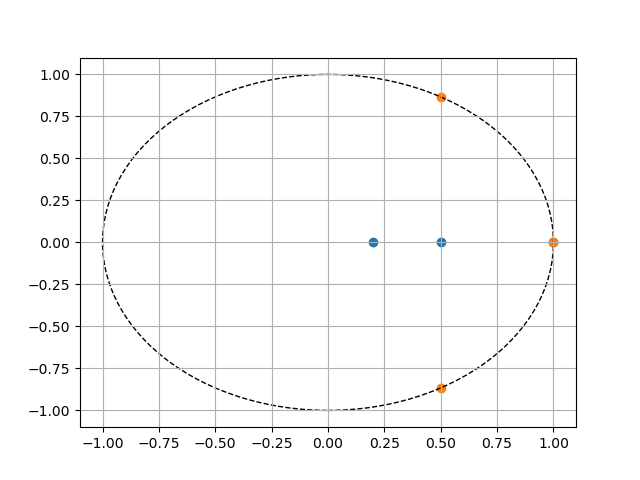

In [8]:
#https://mail.python.org/pipermail/scipy-user/2009-October/022749.html
b = [1, -2, 2, -1]
a = [1, -1.7, 0.8, -0.1]
z,p,k = sc.tf2zpk(b, a) #z son los zeros de la función, p son los polos de la función, k no la usamos pero es la ganancia

fig, ax = plt.subplots()
circle = plt.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax.scatter(p.real,p.imag)
ax.scatter(z.real,z.imag)
ax.grid(True)
ax.add_patch(circle)


Text(0, 0.5, 'h[n]')

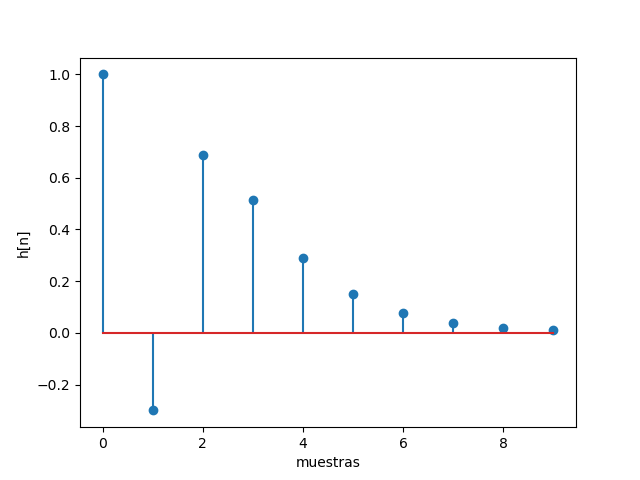

In [15]:
# Respuesta al impulso: 
#coeficientes que acompañan a y
a = [1, -1.7, 0.8, -0.1]
#coeficientes que acompañan a x
b = [1, -2, 2, -1]

h = np.zeros(10); h[0] = 1

resp = sc.lfilter(b, a, h)

plt.close('all'); plt.figure(); plt.stem(resp); plt.xlabel('muestras'); plt.ylabel('h[n]')

# Ejercicio 4
Considere el sistema continuo
$$ H(s) = \frac{12500s}{44s^2 + 60625s + 625 · 10^4} $$
y obtenga la función de transferencia H(z) del sistema discreto correspondiente, mediante la utilizaci´on de las transformaciones conformes de Euler y Bilineal. Para ello:
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3 dB respecto al valor m´aximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de muestreo cuatro veces superior a ésta.
2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y compárelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes.